In [2]:
pip install folium

                                              0.0/100.0 kB ? eta -:--:--
                                              0.0/100.0 kB ? eta -:--:--
                                              0.0/100.0 kB ? eta -:--:--
     ----                                     10.2/100.0 kB ? eta -:--:--
     -----------                           30.7/100.0 kB 660.6 kB/s eta 0:00:01
     ---------------                       41.0/100.0 kB 393.8 kB/s eta 0:00:01
     ----------------------                61.4/100.0 kB 363.1 kB/s eta 0:00:01
     ----------------------------------    92.2/100.0 kB 403.5 kB/s eta 0:00:01
     ------------------------------------ 100.0/100.0 kB 409.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install holidays

                                              0.0/932.4 kB ? eta -:--:--
                                              10.2/932.4 kB ? eta -:--:--
                                              10.2/932.4 kB ? eta -:--:--
     -                                     30.7/932.4 kB 163.8 kB/s eta 0:00:06
     -                                     41.0/932.4 kB 164.3 kB/s eta 0:00:06
     --                                    51.2/932.4 kB 187.9 kB/s eta 0:00:05
     --                                    61.4/932.4 kB 218.8 kB/s eta 0:00:04
     ---                                   92.2/932.4 kB 276.8 kB/s eta 0:00:04
     -----                                143.4/932.4 kB 370.8 kB/s eta 0:00:03
     ------                               174.1/932.4 kB 420.1 kB/s eta 0:00:02
     ---------                            235.5/932.4 kB 497.3 kB/s eta 0:00:02
     ------------                         317.4/932.4 kB 614.4 kB/s eta 0:00:02
     ---------------                      409.6/932.4 kB 75

In [5]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from datetime import datetime
import plotly.graph_objects as go
import holidays
import re
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"C:\Users\nofil\Downloads\All my python work/crime_data_chicago.csv")

In [7]:
df.head() #first 5 rows

Unnamed: 0        ID Case Number                    Date  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR       Primary Type               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  ...  Ward  Community Area  \
0                                  STREET   False  ...  10.0            46.0   
1                               POOL ROOM    True  ...   8.0            47.0   
2                               RESIDENCE    True  ...  39.0            12.0   
3            NURSING HOME/RETIREMENT HOME   False  ...  28.0            26.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False  ...  27.0            28.0   

   FBI Code  X Coordinate  Y Coordinate  Year              Updated On  \
0        14     1196638.0     1848800.0  2008  02/28/2018 03:56:25 PM   
1        15     1184499.0     1843935.0  2018  08/07/2018 04:02:59 PM   
2        05     1146911.0     1941022.0  2007  02/28/2018 03:56:25 PM   
3       08A     1148388.0     1899882.0  2018  07/30/2018 03:52:24 PM   
4       04A     1165430.0     1897441.0  2021  07/18/2021 04:56:02 PM   

    Latitude  Longitude                       Location  
0  41.739980 -87.555120  (41.739979622, -87.555120042)  
1  41.726922 -87.599747  (41.726922145, -87.599746995)  
2  41.994138 -87.734959  (41.994137622, -87.734959049)  
3  41.881217 -87.730590  (41.881217483, -87.730589961)  
4  41.874174 -87.668082  (41.874173691, -87.668082118)  

[5 rows x 23 columns]

In [8]:
# dimension of dataframe
print(f'Number of rows = {df.shape[0]}')
print(f'Number of columns = {df.shape[1]}')

Number of rows = 2278726
Number of columns = 23


### Wrangling

In [9]:
start_nan_sum = df.isna().sum().sort_values(ascending=False)
start_nan_sum

Ward                    184695
Community Area          184267
Location                 23985
Longitude                23985
Latitude                 23985
Y Coordinate             23985
X Coordinate             23985
Location Description      2877
District                    12
Case Number                  1
Updated On                   0
Year                         0
FBI Code                     0
Unnamed: 0                   0
ID                           0
Domestic                     0
Arrest                       0
Description                  0
Primary Type                 0
IUCR                         0
Block                        0
Date                         0
Beat                         0
dtype: int64

### Block

In [10]:
# gets and add 'TH' to Block names with numerical values
need_th = df[df['Block'].str.split(' ').str[2].str.contains(r'[0-9]$')].index.tolist() # gets index of blocks with numbers as names

df.loc[need_th,'Block'] = df.loc[need_th,'Block'].str.split(' ').str[0] +' ' + \
    df.loc[need_th,'Block'].str.split(' ').str[2] + 'TH' + ' ' + \
        df.loc[need_th,'Block'].str.split(' ').str[3:].str.join(' ') # added 'th' to some numeric street names

In [11]:
df['street_name'] = df['Block'].apply(lambda x : ' '.join(str(x).split(' ')[1:])) # gets street name out of block feature column

### District

In [12]:
df['District'].isna().sum() # district start nan value sum

12

In [13]:
df['District'] = df.groupby(['Latitude','Longitude'],dropna=False)['District'].ffill() # forward fill District missing values based on Latitude and Longitude available

df['District'] = df.groupby(['Ward','Community Area','street_name'], dropna=False)['District'].ffill() # forward fill the district remaining values based on the ward, community area and street name

df['District'] = df['District'].astype('int').astype('category') # converts dtype to category objects

In [14]:
df['District'].isna().sum() # district end nan value sum

0

### Location Description

In [15]:
df['Location Description'].isna().sum() # location description start nan value sum

2877

In [16]:
df['Location Description'] = df.groupby('Location', dropna=False)['Location Description'].ffill() # using Location to forward fill missing values in Location description column

df['Location Description'] = df.groupby(['District', 'Ward','Community Area','street_name'], dropna=False)['Location Description'].ffill()

df['Location Description'] = df.groupby(['District', 'Ward','Community Area'], dropna=False)['Location Description'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [17]:
df['Location Description'].isna().sum() # # location description end nan value 

0

#### Latitude and Longitude

In [18]:
# Latitude and Longitude start nan value sum
df[['Latitude','Longitude']].isna().sum()

Latitude     23985
Longitude    23985
dtype: int64

In [19]:
# imputed missing values by grouping by District, Ward and Street name
df[['Latitude','Longitude']] = df.groupby(['District','Ward','Community Area','street_name'],dropna=False)[['Latitude','Longitude']].\
    transform(lambda x: x.fillna(x.median()))

df[['Latitude','Longitude']] = df.groupby(['District','Ward','Community Area'], dropna=False)[['Latitude','Longitude']]\
    .transform(lambda x: x.fillna(x.median())) # imputed missing values of Latitude and Longitude by grouping based on District, Ward and Street name

df[['Latitude','Longitude']] = df.groupby(['District','Ward'], dropna=False)[['Latitude','Longitude']]\
    .transform(lambda x: x.fillna(x.median()))# imputed missing values by grouping by District, Ward

In [20]:
df[['Latitude','Longitude']].isna().sum() # # Latitude and Longitude end nan value sumvalue

Latitude     19
Longitude    19
dtype: int64

#### Ward

In [21]:
df.Ward.isna().sum() # ward start nan value sum

184695

In [22]:
df['Ward'] = df.groupby(['Latitude','Longitude'], dropna=False)['Ward'].ffill() # forward fill based on the Latitude and Longitude
df['Ward'] = df.groupby(['District','Community Area','street_name'], dropna=False)['Ward'].transform(lambda x: x.ffill()) # forward fill based on the Latitude and Longitude
df['Ward'] = df['Ward'].astype('Int64').astype('category') # converts dtype to category objects

In [23]:
df.Ward.isna().sum() # ward end nan value sum

28317

####  Community Area

In [24]:
df['Community Area'].isna().sum() #community area start nan value sum

184267

In [25]:
df['Community Area'] = df.groupby(['Latitude','Longitude'], dropna=False)['Community Area'].ffill() # forward fill based on the Latitude and Longitude available

df['Community Area'] = df.groupby(['District','Ward','street_name'], dropna=False)['Community Area'].transform(lambda x: x.ffill()) # imputed missing values by grouping by District, Ward and Street name

df['Community Area'] = df.groupby(['District','Ward'], dropna=False)['Community Area'].transform(lambda x : x.ffill()) # imputed missing values by grouping by District and Ward 

df['Community Area'] = df['Community Area'].astype('Int64').astype('category') # converts dtype to category objects

In [26]:
# community area end nan value sum
df['Community Area'].isna().sum() 

28317

In [27]:
end_nan_values = df.isna().sum().sort_values(ascending=False)

In [28]:
end_nan_values.pop('street_name')
print('Percentage of NaN values imputed')
round((start_nan_sum - end_nan_values)/start_nan_sum*100,2).fillna(0.0).sort_values(ascending=False)

Percentage of NaN values imputed


District                100.00
Location Description    100.00
Longitude                99.92
Latitude                 99.92
Ward                     84.67
Community Area           84.63
Arrest                    0.00
Location                  0.00
Y Coordinate              0.00
X Coordinate              0.00
Updated On                0.00
Unnamed: 0                0.00
Primary Type              0.00
IUCR                      0.00
Beat                      0.00
ID                        0.00
FBI Code                  0.00
Domestic                  0.00
Description               0.00
Date                      0.00
Case Number               0.00
Block                     0.00
Year                      0.00
dtype: float64

In [29]:
df.dropna(subset=['Ward','Community Area','Latitude','Longitude','Case Number'], axis=0,inplace=True)
df.drop(columns=['ID','Unnamed: 0','Location','IUCR','X Coordinate','Y Coordinate','Block'], axis=1,inplace=True)

In [30]:
# ckeck duplicated rows
df[df.duplicated()].shape[0]

15

In [31]:
df1 = df.copy() # copy of df without without dropping duplicates
df = df.drop_duplicates() # dropped duplicates 
# df.to_csv('cleaned crime.csv')


In [32]:
date_time = pd.to_datetime(df['Date'],format='%m/%d/%Y %I:%M:%S %p')
df['day'] = date_time.dt.day.astype('category') # day number
df['day_name'] = date_time.dt.day_name() # day name
df['month_name'] = date_time.dt.month_name() # month name
df['time'] = date_time.dt.timetz # time of the day
df['date'] = date_time.dt.date
Hour = date_time.dt.hour

In [33]:
def time_of_day(hour):
    """
    Categorizes time as day or night based on the hour.
    """
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [34]:
# mapping of months to seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
# Creating the Season column using mapping
df['Season'] = date_time.dt.month.map(seasons)

In [35]:
def weekends(dayname):
    """
    Categorises weekend based on based on day name of the week
    """
    if dayname in ['Saturday','Sunday']:
        return True
    return False

In [36]:
df['weekends'] = df['day_name'].map(weekends)

In [37]:
def categorise_location(loc):

    if any(word in loc for word in ['RESIDENCE', 'APARTMENT', 'HOME', 'YARD', 'PORCH','BASEMENT', 'HOUSE','RESIDENTIAL','GARAGE''DRIVEWAY']):
        return 'RESIDENTIAL'
    elif any(word in loc for word in ['BANK', 'CREDIT', 'ATM','CURRENCY',"SAVINGS",'COIN']):
        return 'FINANCE'
    elif any(word in loc for word in ['STREET', 'HIGHWAY', 'BREEZEWAY','LAKE',"BRIDGE",'ALLEY','RIVER','VACANT']):
        return 'STREET/OPEN SPACE'
    elif any(word in loc for word in ['BUSINESS', 'STORE', 'SHOP', 'MALL', 'RETAIL', 'MARKET', 'FACTORY','OFFICE']):
        return 'COMMERCIAL'
    elif any(word in loc for word in ['CTA','TRANSPORTATION','AUTO', 'VEHICLE', 'AIRPORT','AIR', 'STATION', 'BUS', 'TRAIN','TRUCK', 'BOAT', 'TAXI', 'LYFT', 'UBER', 'RAIL']):
        return 'TRANSPORT'
    elif any(word in loc for word in ['SCHOOL', 'COLLEGE', 'UNIVERSITY', 'EDUCATIONAL','LIBRARY']):
        return 'EDUCATIONAL'
    elif any(word in loc for word in ['HOSPITAL', 'NURSING', 'HEALTH', 'MEDICAL', 'CLINIC']):
        return 'HEALTHCARE'
    elif any(word in loc for word in ['PARK', 'RECREATIONAL', 'ARENA', 'STADIUM','TAVERN', 'CLUB', 'GYM','POOL','PLAY','BOWLING','BAR']):
        return 'RECREATIONAL/RELAXATION'
    elif any(word in loc for word in ['CHURCH', 'SYNAGOGUE','WORSHIP','MOSQUE']):
        return 'RELIGIOUS'
    elif any(word in loc for word in ['HOTEL', 'MOTEL','HOTEL/MOTEL']):
        return 'HOTEL/MOTEL'
    elif any(word in loc for word in ['GOVERNMENT','FEDERAL','STATE','CHA','JAIL / LOCK-UP FACILITY','FOREST']):
        return 'GOVERNMENT PROPERTY'
    else:
        return loc

In [38]:
df['categorise location'] = df['Location Description'].map(categorise_location)

## DESCRIPTIVE STATISTICS

In [39]:
# top10  ranked crime
crime_ranking = df['Primary Type'].value_counts()
crime_ranking[:10]

THEFT                  473960
BATTERY                413336
CRIMINAL DAMAGE        255999
NARCOTICS              220464
ASSAULT                145820
OTHER OFFENSE          139511
BURGLARY               123218
MOTOR VEHICLE THEFT    104061
DECEPTIVE PRACTICE      98717
ROBBERY                 84729
Name: Primary Type, dtype: int64

[]

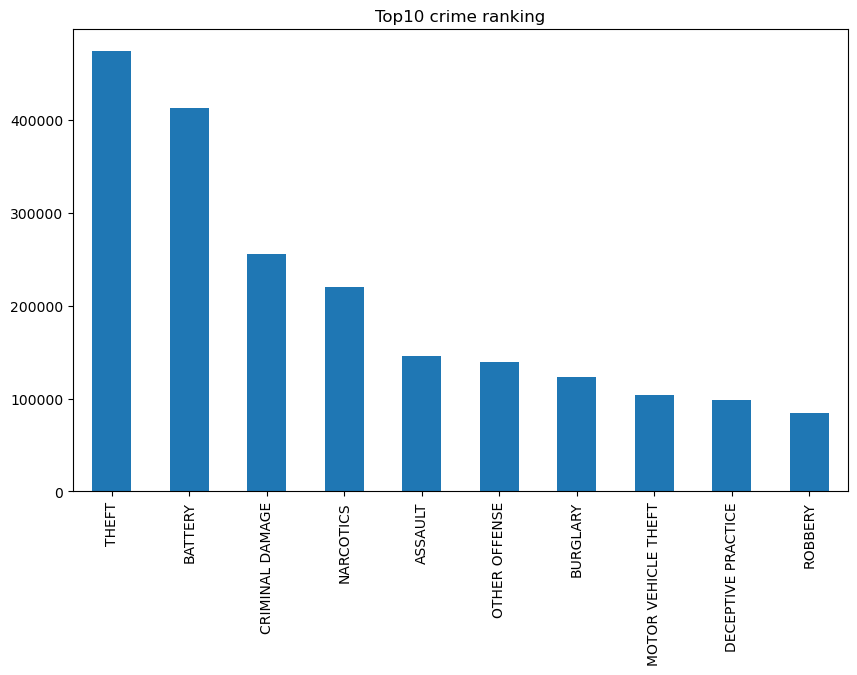

In [40]:
# top 10 ranked crime
fig = plt.figure(figsize=(10,6))
crime_ranking[:10].plot(kind='bar').set_title('Top10 crime ranking')
plt.plot()

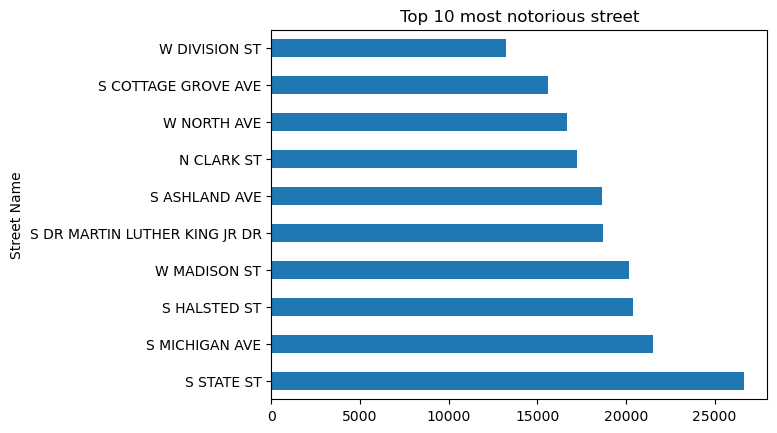

In [41]:
# top 10 notorious street in Chicago
most_notorious_Str = df['street_name'].value_counts()[:10]
most_notorious_Str.plot(kind = 'barh').set_title('Top 10 most notorious street')
plt.ylabel('Street Name')
plt.show()

#### Domestic and Non Domestic Crimes

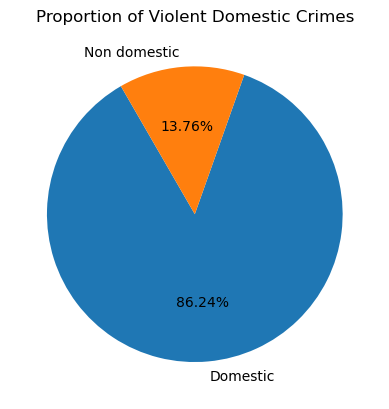

In [42]:
violent_domestic_crimes = df['Domestic'].value_counts(normalize=True)
violent_domestic_crimes.plot(kind='pie', autopct='%1.2f%%', startangle=120, labels=['Domestic', 'Non domestic'])
plt.title('Proportion of Violent Domestic Crimes')
plt.ylabel('')
plt.show()


#### CHILDREN RELATED OFFENCES

In [43]:
# offence related with children
off_children = df[df['Primary Type'].str.contains('child',case=False) | (df['Description'].str.contains('child', case=False)) |
                  (df['Description'].str.contains('by minor', case=False))|(df['Description'].str.contains('to minor', case=False)) |
                  (df['Description'].str.contains('MINOR MISREPRESENT AGE', case=False)) | (df['Description'].str.contains('employ moinor', case=False))]

In [44]:
off_children.shape[0]/df.shape[0]*100

0.9388217247444203

~ 1% of crime reported are child related offences

In [45]:
off_children['Domestic'].value_counts(normalize=True)

False    0.571733
True     0.428267
Name: Domestic, dtype: float64

57% of the recorded cases are non domestic crimes

In [46]:
off_children['Arrest'].value_counts(normalize=True)

False    0.674445
True     0.325555
Name: Arrest, dtype: float64

#### RED ZONES AND SAFE ZONES

In [47]:
danger_zone = df.groupby('Location Description')['Primary Type'].count().idxmax()
safe_zone = df.groupby('Location Description')['Primary Type'].count().idxmin()
print(f'The location with the highest incidence of crime  --> {danger_zone}')
print(f'The location with the lowest incidence of crime  --> {safe_zone}')

The location with the highest incidence of crime  --> STREET
The location with the lowest incidence of crime  --> BANQUET HALL


In [48]:
arrest = df.groupby(['Primary Type','Arrest','Year']).size().reset_index(name ='arrest_per_yr')

no_arrest = arrest.loc[arrest['Arrest'] == False]
arrested = arrest.drop(no_arrest.index)

total_arrested = arrested.groupby('Primary Type')['arrest_per_yr'].sum()
crime_idx_max = total_arrested.idxmax()  # Get the index (Primary Type) with the maximum total arrests
crime_idx_min = total_arrested.idxmin()
max_count = total_arrested[crime_idx_max]  # Get the maximum total arrests count
min_count = total_arrested[crime_idx_min]

print(f"The Crime with the highest number of arrests over the years --> '{crime_idx_max}' with {max_count} arrests.")
print(f"The Crime with the lowest number of arrests over the years --> '{crime_idx_min}' with {min_count} arrests.")

The Crime with the highest number of arrests over the years --> 'NARCOTICS' with 219131 arrests.
The Crime with the lowest number of arrests over the years --> 'RITUALISM' with 1 arrests.


#### Day with the highest crime record

In [49]:
crime_check = df[['month_name','day_name','Season','Primary Type']]

In [50]:
crime_by_day = crime_check.groupby('day_name')['Primary Type'].count()
max_day = crime_by_day.idxmax()
min_day = crime_by_day.idxmin()
print(f'The Day with the highest crime record is often --> {max_day}')
print(f'The Day with the lowest crime record is often --> {min_day}')

The Day with the highest crime record is often --> Friday
The Day with the lowest crime record is often --> Sunday


In [51]:
# subset df for crime check
crime_check = df[['month_name','day_name','Season','Primary Type']]

In [52]:
crime_by_Month = crime_check.groupby('month_name')['Primary Type'].count()
max_month = crime_by_Month.idxmax()
min_month = crime_by_Month.idxmin()
print(f'The Month with the highest crime record is often --> {max_month}')
print(f'The Month with the lowest crime record is often --> {min_month}')

The Month with the highest crime record is often --> July
The Month with the lowest crime record is often --> February


In [53]:
crime_by_Season = crime_check.groupby('Season')['Primary Type'].count()
max_Season = crime_by_Season.idxmax()
min_Season = crime_by_Season.idxmin()
print(f'The Season with the highest crime record is often --> {max_Season}')
print(f'The Season with the lowest crime record is often --> {min_Season}')

The Season with the highest crime record is often --> Summer
The Season with the lowest crime record is often --> Winter


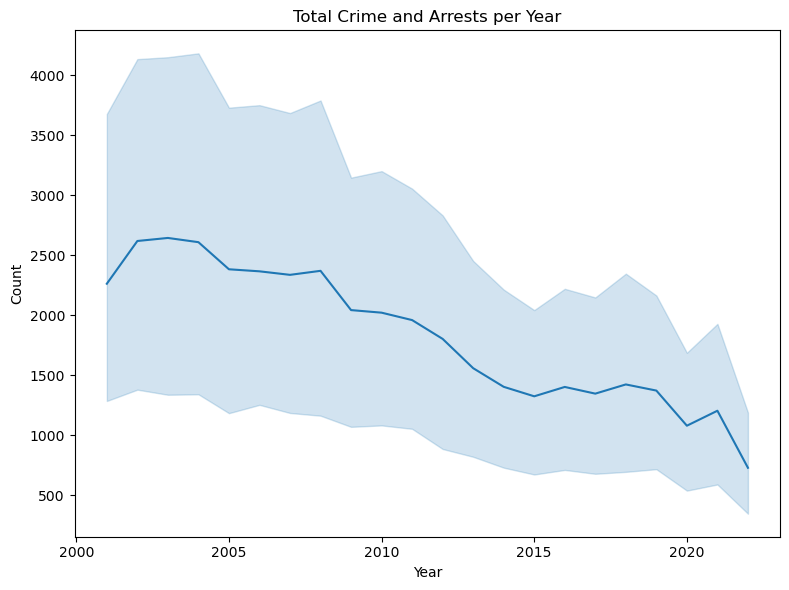

In [54]:
# Grouping the DataFrame by 'Primary Type' and 'Year' and counting occurrences
crime_count = df.groupby(['Arrest', 'Year', 'Primary Type']).size().reset_index(name='Count')

# Plotting the graph
plt.figure(figsize=(8, 6))
sns.lineplot(data=crime_count, x='Year', y='Count')
plt.title('Total Crime and Arrests per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Figure 1.0 illustrates the fluctuation of crime rates throughout the years.

Notably, there is a substantial decrease in crime incidents in 2022, with 37,065 incidents compared to 62,525 in 2021. This reduction signifies a decrease of approximately 40.72% in crime.

### A view of the correlation between the types of crimes.

This was done in three steps:

i A correlation view between the top 10 frequent crimes across the years

i. A correlation view between the least 10 frequent crimes across the years

iii. A correlation view between the top 5 and least 5 frequent crimes across the years

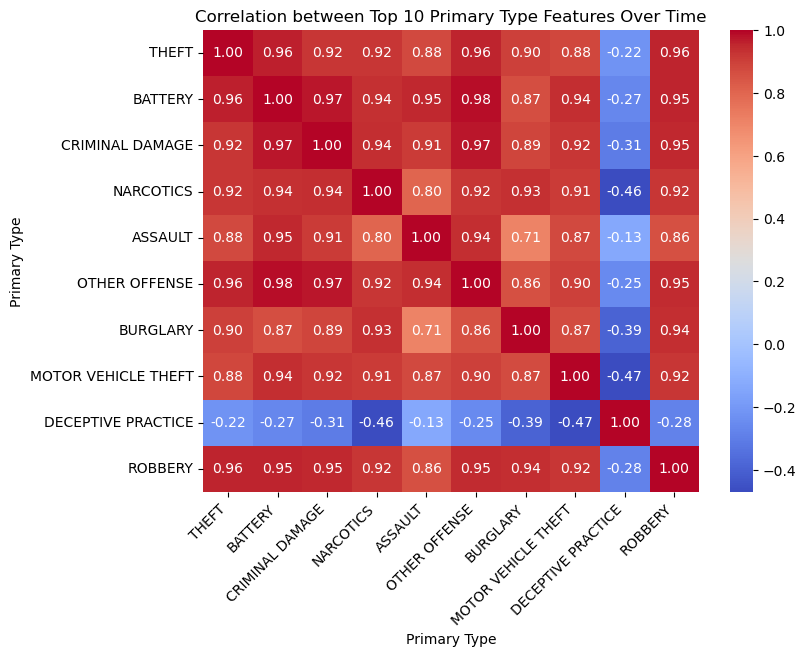

In [55]:
#correlation view between the top 10 frequent crimes across the years

# Group by 'Year' and 'Primary Type' and count occurrences
primary_type_by_year = df.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Select top 10 primary type features
top_10_primary_types = primary_type_by_year.sum().nlargest(10).index

# Filter primary type data to include only top 5 primary types
top_10_primary_type_data = primary_type_by_year[top_10_primary_types]

# Compute correlation matrix
correlation_matrix = top_10_primary_type_data.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Top 10 Primary Type Features Over Time')
plt.xlabel('Primary Type')
plt.ylabel('Primary Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment)
plt.yticks(rotation=0)
plt.show()

From the heatmap above the data shows high correlated movements amongst the top 10 frequent crimes across the years.

The indication is that the crimes showed similar patterns of increasing and decreasing frequencies over time.

However, notably, Deceptive Practice demonstrated unrelated pattern of frequency with the rest of the top 10 crimes.

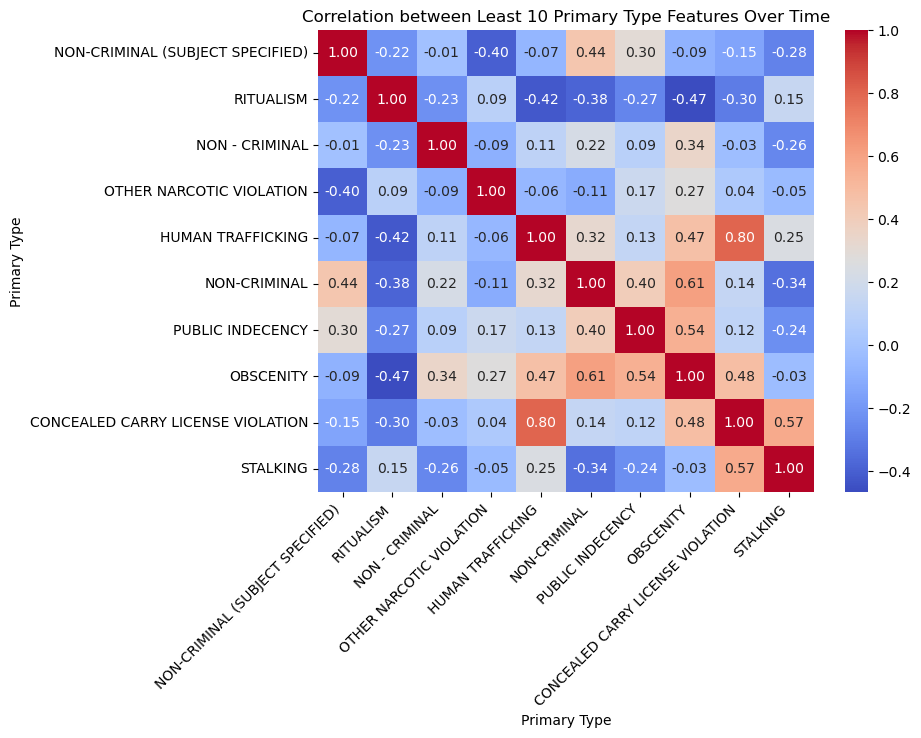

In [56]:
## correlation view between the least 10 frequent crimes across the years

# Select least 10 primary type features
bottom_10_primary_types = primary_type_by_year.sum().nsmallest(10).index

# Filter primary type data to include only least 10 primary types
bottom_10_primary_type_data = primary_type_by_year[bottom_10_primary_types]

# Compute correlation matrix
correlation_matrix = bottom_10_primary_type_data.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Least 10 Primary Type Features Over Time')
plt.xlabel('Primary Type')
plt.ylabel('Primary Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment))
plt.yticks(rotation=0)
plt.show()

The data shows mostly very low correlated to highly uncorrelated movements amongst the least 10 frequent crimes across the years. The indication is that the crimes patterns are mostly independent of one another with differing patterns of increasing and decreasing frequencies over time. The most uncorrelated pattern is between Intimidation and Human trafficking.

However some crimes showed high correlated patterns notably between:

- Intimidation and Kidnapping
- Intimidation and Ritualism
- Concealed Carry license violation and Human Trafficking



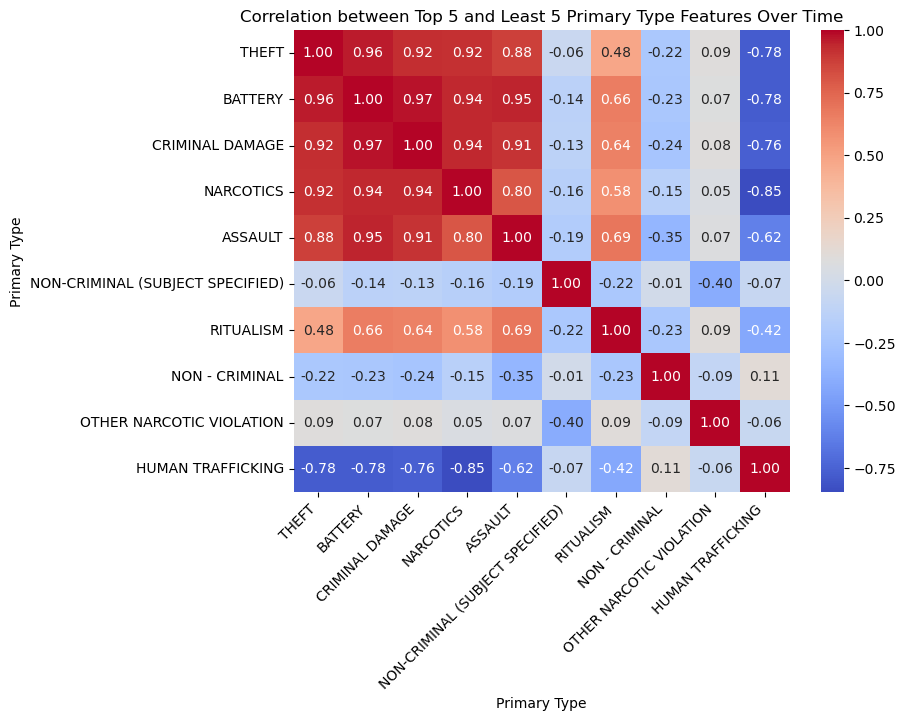

In [57]:
### correlation view between the top 5 and least 5 frequent crimes across the years

# Select top 5 and least 5 primary type features
top_5_primary_types = primary_type_by_year.sum().nlargest(5).index
least_5_primary_types = primary_type_by_year.sum().nsmallest(5).index

# Filter primary type data to include only top 5 and least 5 primary types
top_5_primary_type_data = primary_type_by_year[top_5_primary_types]
least_5_primary_type_data = primary_type_by_year[least_5_primary_types]

# Combine data for top 5 and least 5 primary types
combined_data = pd.concat([top_5_primary_type_data, least_5_primary_type_data], axis=1)

# Compute correlation matrix
correlation_matrix = combined_data.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Top 5 and Least 5 Primary Type Features Over Time')
plt.xlabel('Primary Type')
plt.ylabel('Primary Type')
plt.xticks(rotation=45,ha='right')  # Adjust rotation angle and alignment
plt.yticks(rotation=0)
plt.show()

In this table, the data still shows consistency as seen previously, with high correlation among the top crimes and low to uncorrelated patterns among the least frequent crimes.

However there is indication that Ritualism (a low frequent crime) is highly correlated with 4 Top frequent crimes notably Battery, Criminal Damage, Narcotics and Assault.

On the flip side, Human Trafficking (also a low frequent crime) shows high uncorrelation with all 5 Top frquent crimes Theft, Battery, Criminal Damage, Narcotics and Assault.

The correlation pattern for the other 3 low frequent crimes compared with the Top frequent crimes is mostly low to uncorrelated.

#### CRIME OVER THE YEARS

In [58]:
df_index = df.copy().set_index(date_time) # setting the index to be the date will help us a lot later on

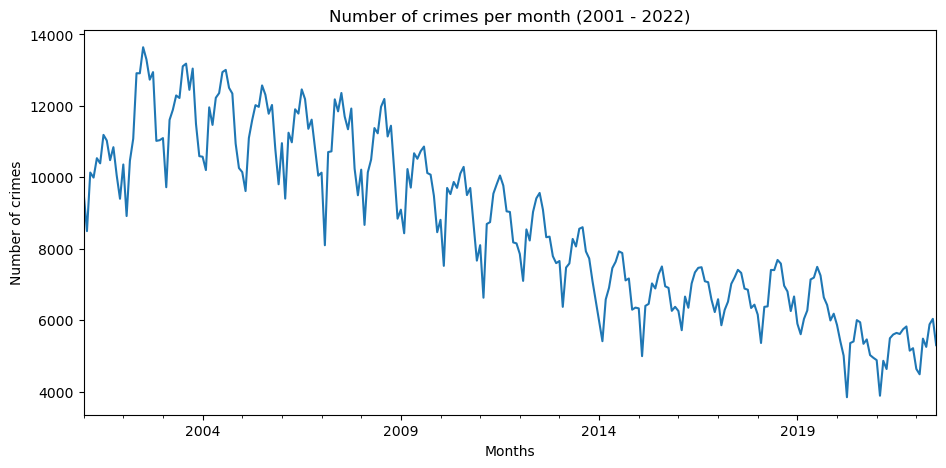

In [59]:
plt.figure(figsize=(11,5))
df_index.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2022)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

This chart shows a clear "periodic" pattern in the crimes over many years.

I want to answer the question: How crime has changed over the years?, is it decreasing?

Let's have a look at what we have (from 2001 to 2022). According to the chart above, it is safe to say that crime has been decreasing over the years.

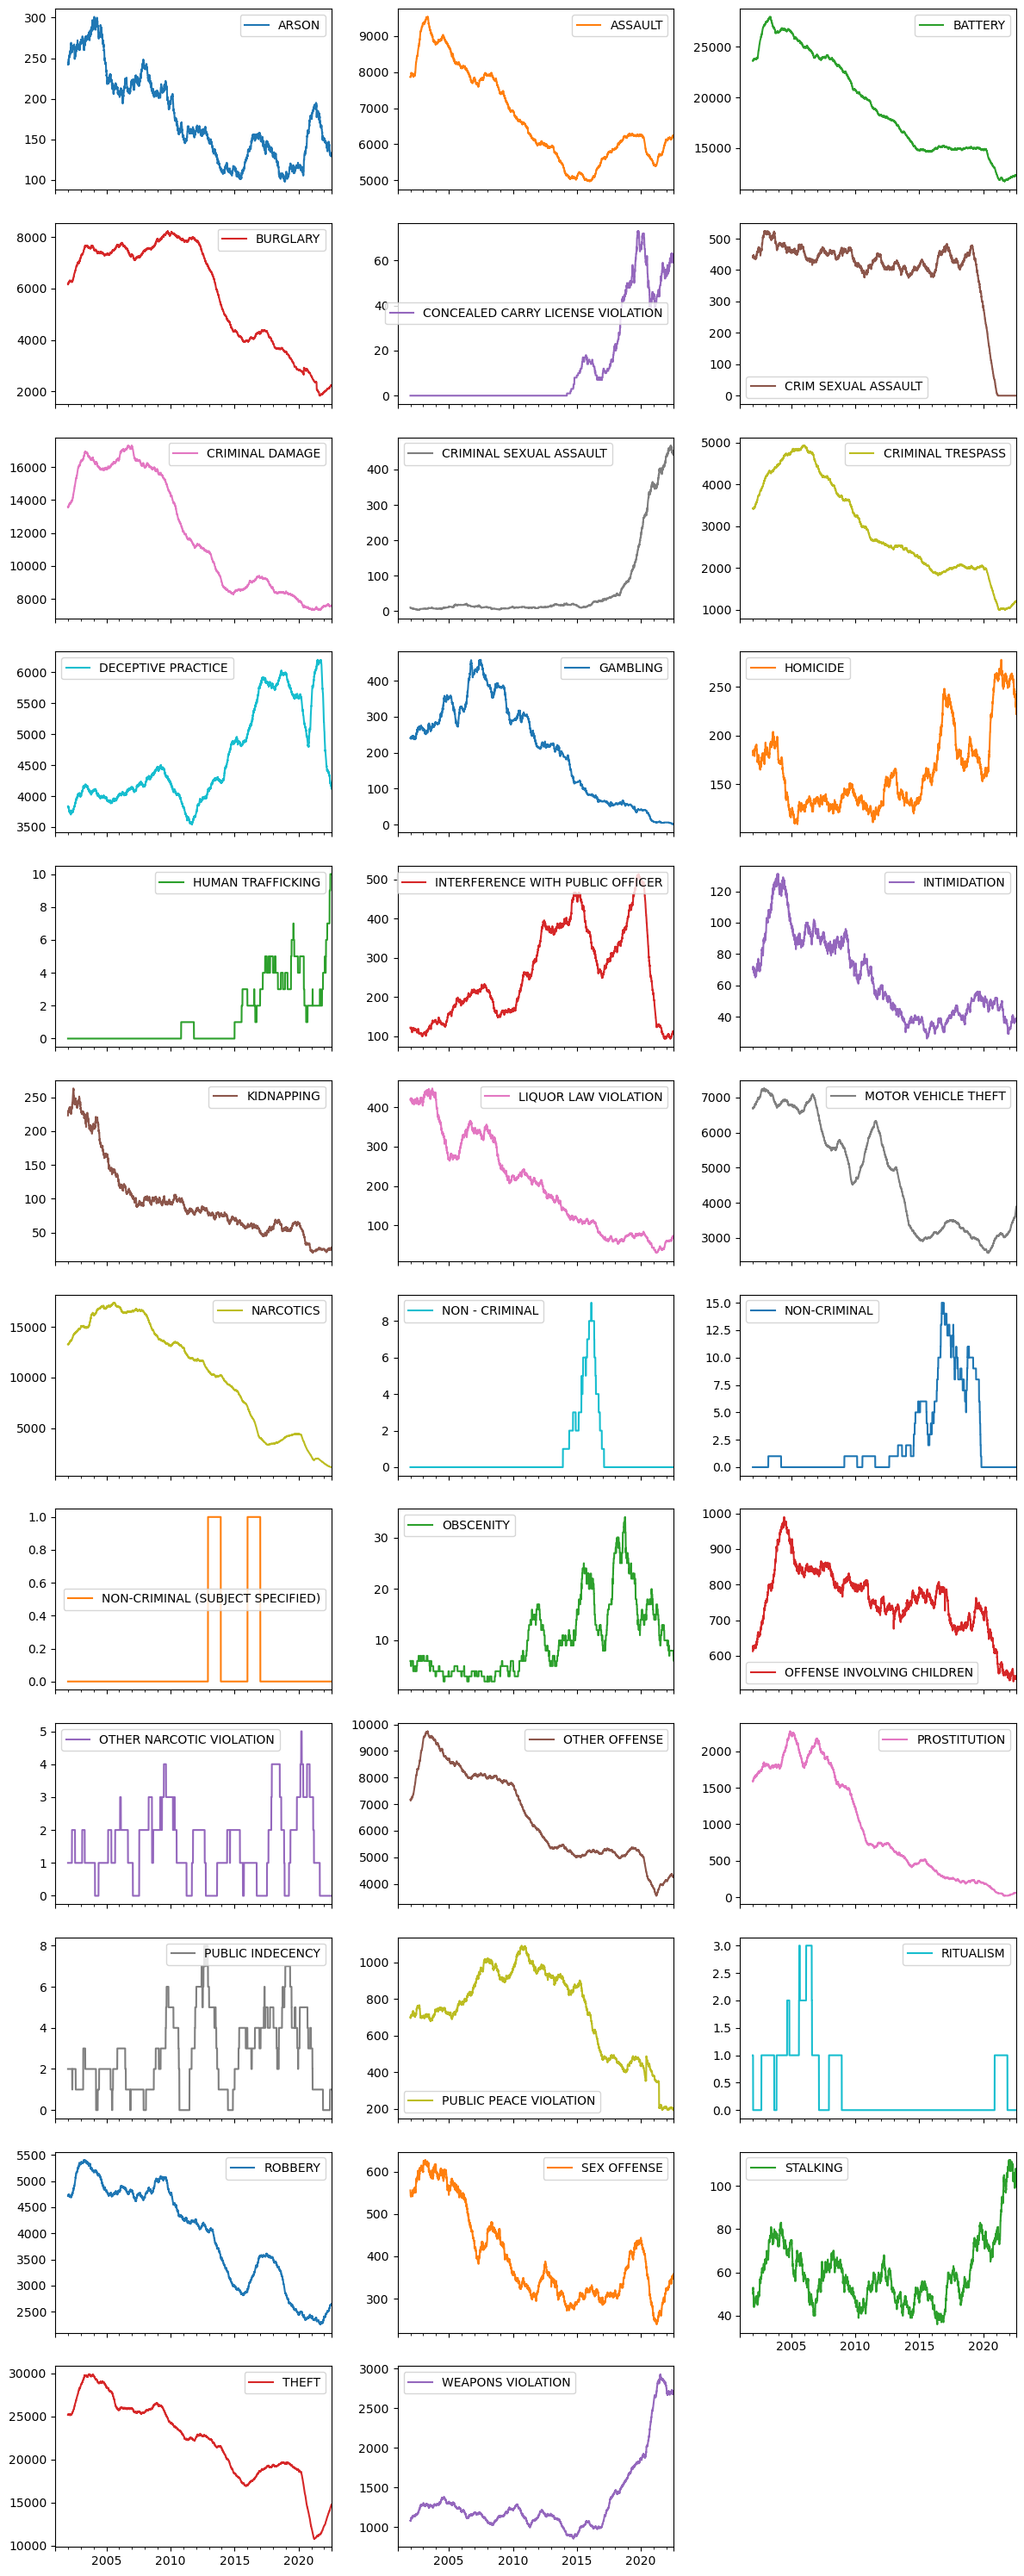

In [60]:
crimes_count_date = df_index.pivot_table('Case Number', aggfunc=np.size, columns='Primary Type', index=df_index.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3))
plt.tight_layout()

These charts show the periodic pattern of each crime over the years.

I hoped it reflected an average trend toward decreasing crimes. But it was not the case.

Some crime types are actually increasing all along like homicide, weapons violation, human trafficking,etc.

Other types started to increase slightly before 2022 like theft, robbery,offense involving children, etc.

##### Holidays and Crime

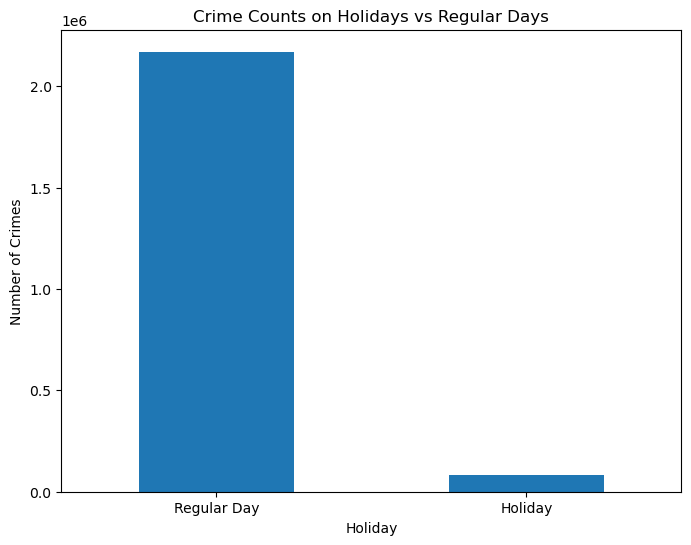

In [66]:
# Get holidays data for Chicago
chicago_holidays = holidays.US(state='IL',years=list(range(2001,2023)))
chicago_holidays_str = {key.strftime('%Y-%m-%d'): value for key, value in chicago_holidays.items()}
date_ = df['date'].map(str)
df['Holiday'] = date_.isin(chicago_holidays_str)

# Group by 'Holiday' and count the number of crimes
crime_counts = df.groupby('Holiday').size()

# Plotting
plt.figure(figsize=(8, 6))
crime_counts.plot(kind='bar')
plt.title('Crime Counts on Holidays vs Regular Days')
plt.xlabel('Holiday')
plt.ylabel('Number of Crimes')
plt.xticks([0, 1], ['Regular Day', 'Holiday'], rotation=0)
plt.show()

As shown in the chart above, there are more crimes on regular days compared to holidays

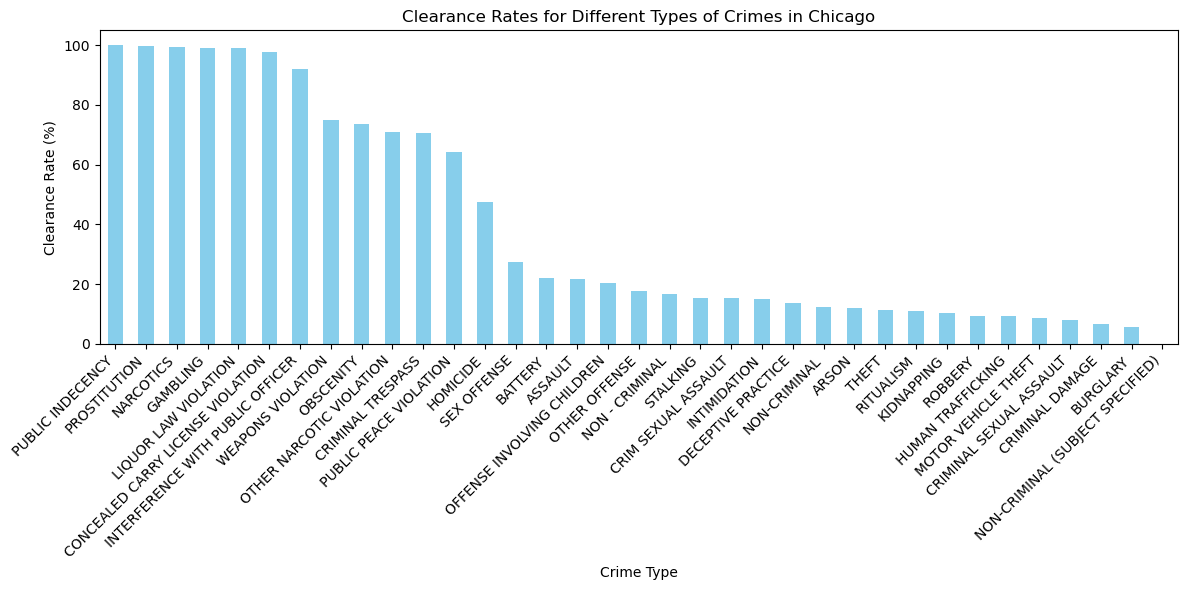

In [61]:
# Group by 'Primary Type' and calculate clearance rates
clearance_rates = df.groupby('Primary Type')['Arrest'].mean() * 100

# Plot clearance rates for different types of crimes
plt.figure(figsize=(12, 6))
clearance_rates.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Clearance Rates for Different Types of Crimes in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Clearance Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

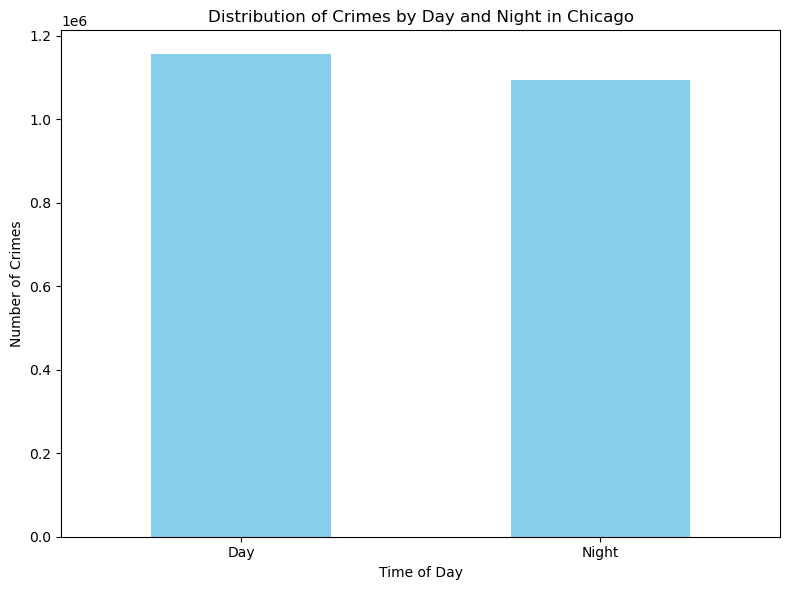

In [62]:
# Define day and night time ranges
night_time_range = list(range(18, 24)) + list(range(0, 6))  # Concatenate the two ranges

# Categorize crimes as day or night
df['Day_Night'] = 'Day'
df.loc[Hour.isin(night_time_range), 'Day_Night'] = 'Night'

# Group by 'Day_Night' and count occurrences of each category
day_night_counts = df['Day_Night'].value_counts()

# Plot the distribution of crimes by day and night
plt.figure(figsize=(8, 6))
day_night_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crimes by Day and Night in Chicago')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

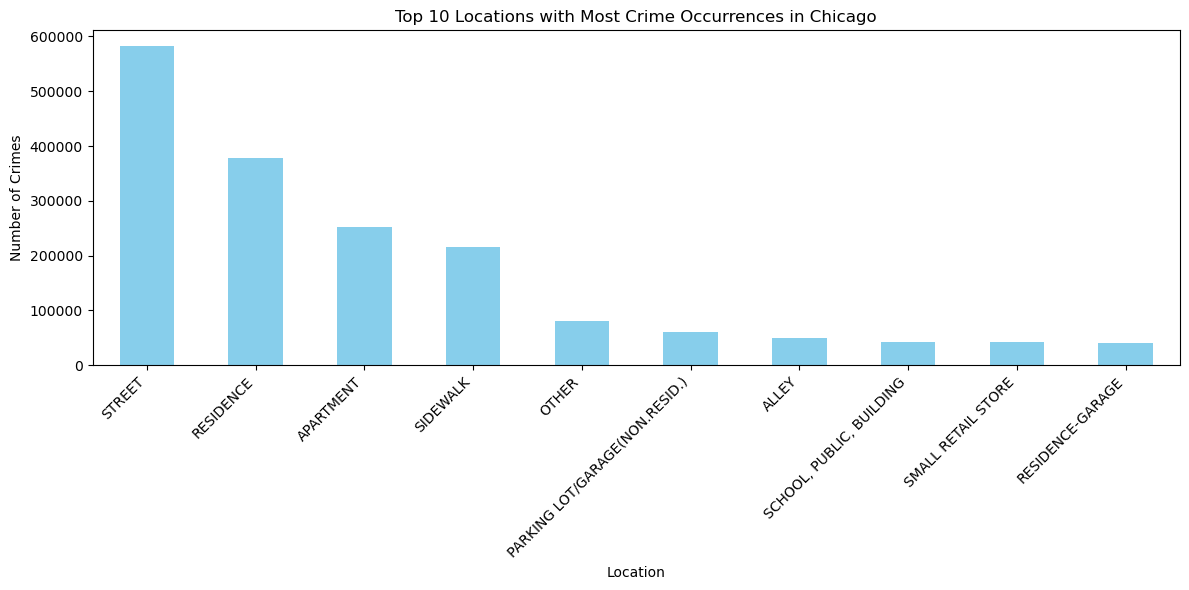

In [63]:
# Group by location (e.g., neighborhood or district) and count occurrences of each location
location_counts = df['Location Description'].value_counts()

# Plot the top 10 locations with the most crime occurrences
plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with Most Crime Occurrences in Chicago')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
# Extract the month from the 'Date' column
df['Month'] = date_time.dt.month_name()

# Count the number of crime incidents for each month
monthly_counts = df.groupby('Month').size()

# Get the month with the most and least crime incidents
most_crime_month = monthly_counts.idxmax()
least_crime_month = monthly_counts.idxmin()

# Create bar chart datadf[]
bar_chart_data = go.Bar(
    x=monthly_counts.index,  # Months on the x-axis
    y=monthly_counts.values,  # Number of crime incidents on the y-axis
    marker=dict(
        color=['blue' if month == most_crime_month else 'red' if month == least_crime_month else 'grey' for month in monthly_counts.index],  # Special color for the most and least crime months
    ),
)

# Create layout for the bar chart
layout = go.Layout(
    title='Chicago Crime Incidents by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Crime Incidents'),
)

# Create figure with bar chart data and layout
fig = go.Figure(data=bar_chart_data, layout=layout)

# Show the figure
fig.show()


In [66]:
# Count the number of crime incidents for each year
yearly_counts = df.groupby('Year').size()

# Get the year with the most and least crime incidents
most_crime_year = yearly_counts.idxmax()
least_crime_year = yearly_counts.idxmin()

# Create bar chart data
bar_chart_data = go.Bar(
    x=yearly_counts.index,  # Years on the x-axis
    y=yearly_counts.values,  # Number of crime incidents on the y-axis
    marker=dict(
        color=['blue' if year == most_crime_year else 'red' if year == least_crime_year else 'grey' for year in yearly_counts.index],  # Special color for the most and least crime years
    ),
)

# Create layout for the bar chart
layout = go.Layout(
    title='Chicago Crime Incidents by Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Crime Incidents'),
)

# Create figure with bar chart data and layout
fig = go.Figure(data=bar_chart_data, layout=layout)

# Show the figure
fig.show()


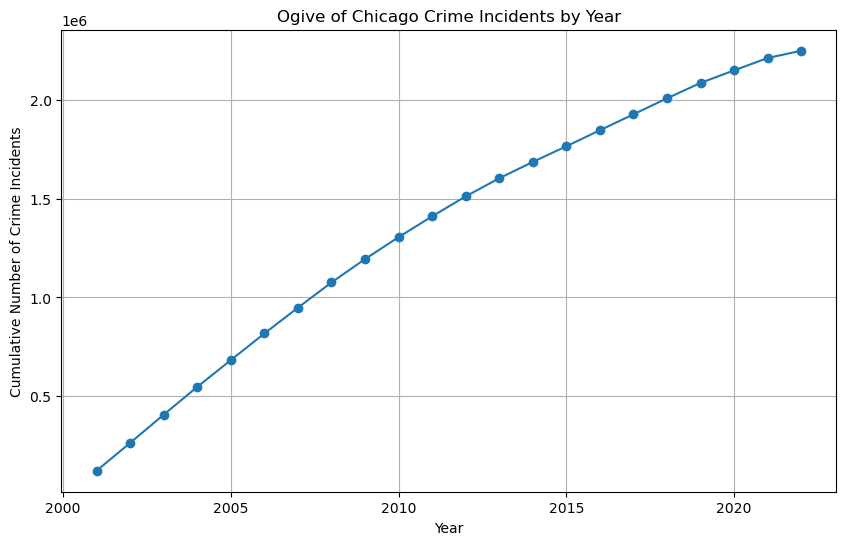

In [67]:
# Calculate cumulative sum of crime incidents
cumulative_counts = yearly_counts.cumsum()

# Create ogive plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-')

# Add labels and title
plt.title('Ogive of Chicago Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Crime Incidents')

# Show plot
plt.grid(True)
plt.show()


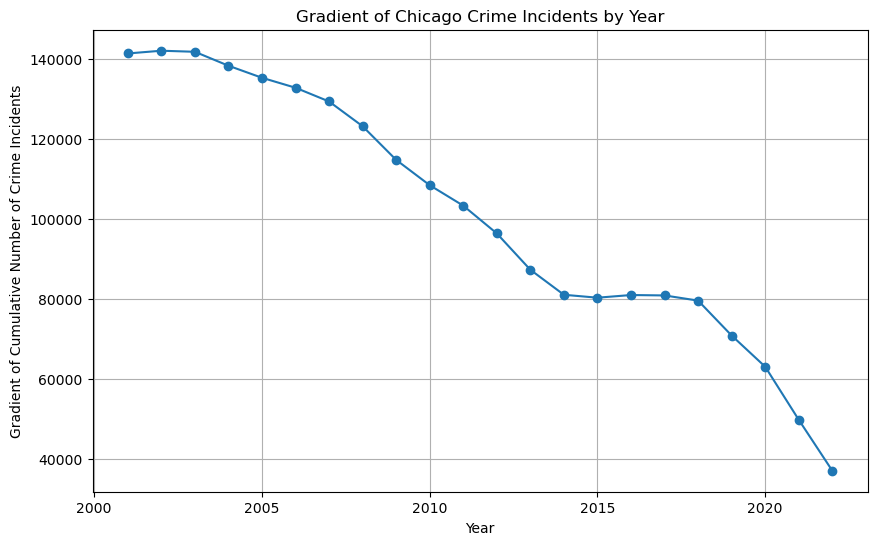

In [68]:
# Calculate cumulative sum of crime incidents
cumulative_counts = yearly_counts.cumsum()

# Calculate the gradient (first derivative) using numpy's gradient function
years = cumulative_counts.index
gradient = np.gradient(cumulative_counts.values, years)

# Create plot of the gradient across the years
plt.figure(figsize=(10, 6))
plt.plot(years, gradient, marker='o', linestyle='-')

# Add labels and title
plt.title('Gradient of Chicago Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Gradient of Cumulative Number of Crime Incidents')

# Show plot
plt.grid(True)
plt.show()



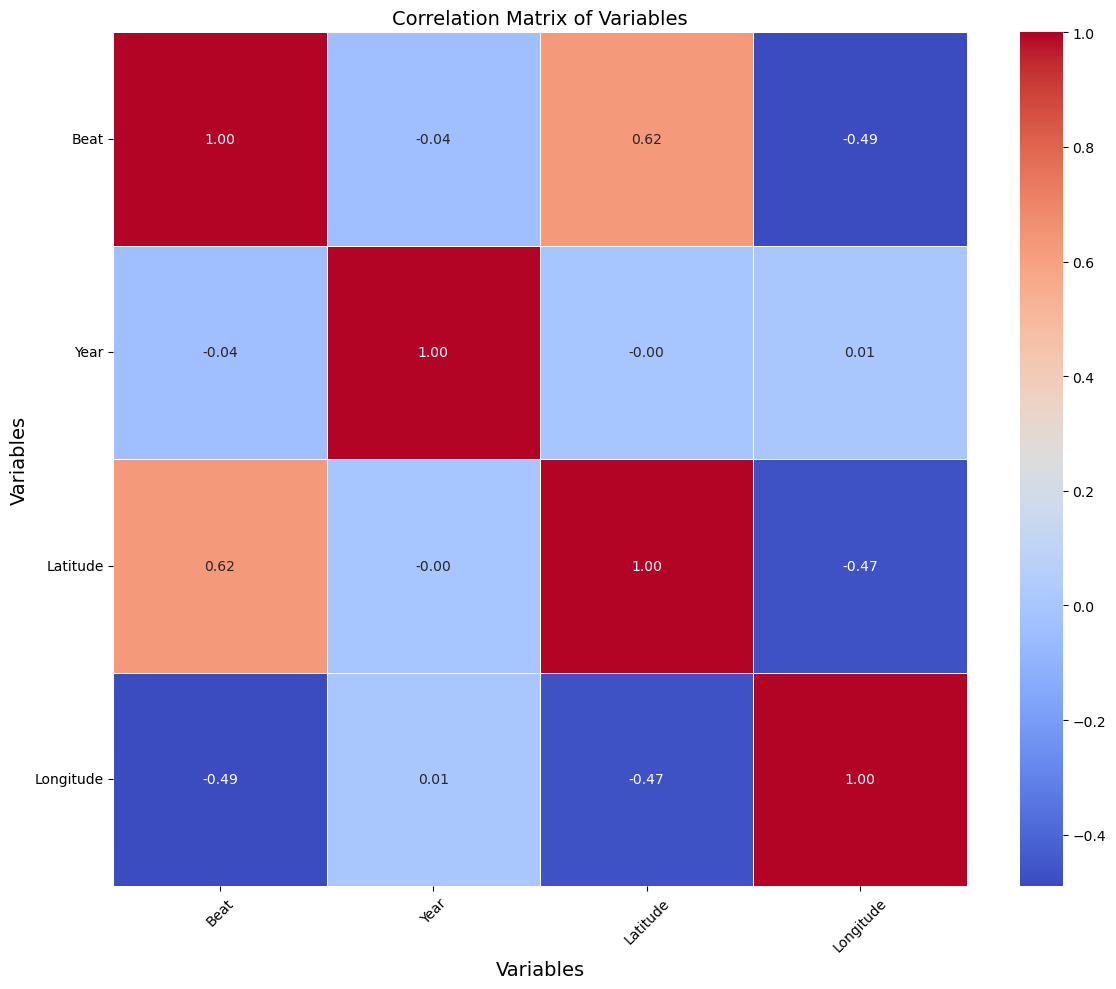

In [69]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))  # Increased figsize for better visualization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


########### OUT OF MEMORY ###########

# Calculate the mean latitude and longitude of your data
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()

fig = go.Figure()

# Add Choroplethmapbox trace
fig.add_trace(
    go.Choroplethmapbox(
        geojson="chicago-community-areas.geojson",  # GeoJSON data for Chicago boundaries
        locations=df['Location Description'],  # Neighborhood names
        z=df['Crime_Count'],  # Crime counts for each neighborhood
        colorscale='RdBu',  # Choose colorscale (you can change this)
        colorbar=dict(title='Crime_Count'),  # Add colorbar title
        marker_line_width=0.5,
    )
)

# Update layout of the map
fig.update_layout(
    title_text='Chicago Crime Incidents by Neighborhood',  # Title of the map
    mapbox=dict(
        style='carto-positron',  # Choose map style (you can customize this)
        center=dict(lat=mean_latitude, lon=mean_longitude),  # Center the map around the mean latitude and longitude
        zoom=10,  # Initial zoom level
    )
)

# Show the figure
fig.show()

In [70]:
# Time of occurrence analysis
plt.figure(figsize=(10, 6))
sns.histplot(domestic_cases['Time_Category'], color='blue', alpha=0.5, label='Domestic', stat='count')
sns.histplot(non_domestic_cases['Time_Category'], color='red', alpha=0.5, label='Non-Domestic', stat='count')
plt.title('Hourly Distribution of Domestic vs. Non-Domestic Cases')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'domestic_cases' is not defined

<Figure size 1000x600 with 0 Axes>

In [71]:
# Time of occurrence analysis
plt.figure(figsize=(10, 6))
sns.histplot(domestic_cases['Date'].dt.hour, bins=24, color='blue', alpha=0.5, label='Domestic')
sns.histplot(non_domestic_cases['Date'].dt.hour, bins=24, color='red', alpha=0.5, label='Non-Domestic')
plt.title('Hourly Distribution of Domestic vs. Non-Domestic Cases')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'domestic_cases' is not defined

<Figure size 1000x600 with 0 Axes>

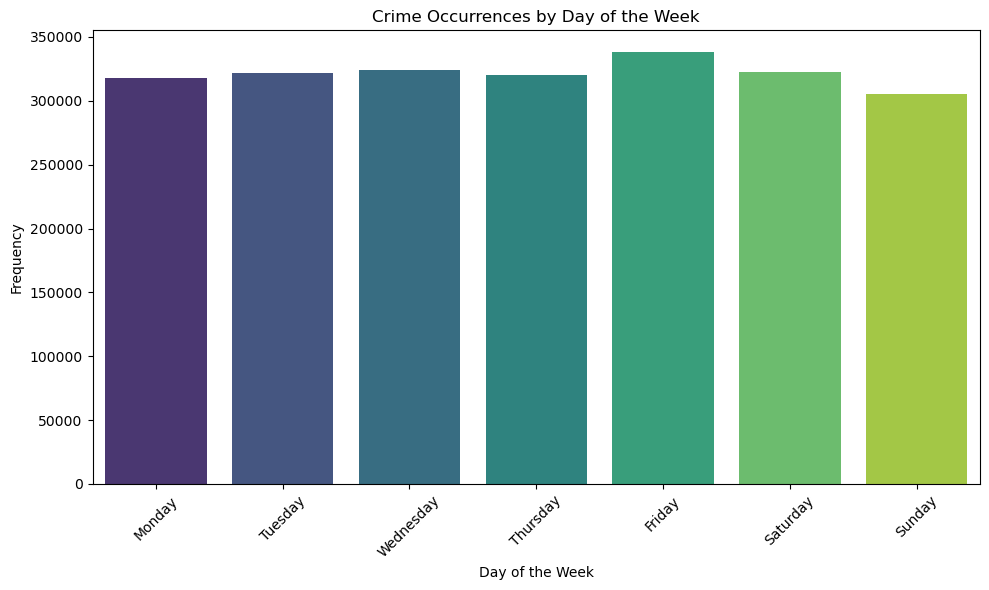

In [72]:
# Group by day of the week and count occurrences of each day
day_counts = df['day_name'].value_counts().sort_values(ascending=True)

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the days with the most crime occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values,order = day_order,  palette="viridis")
plt.title('Crime Occurrences by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### DOMESTIC VS NON DOMESTIC

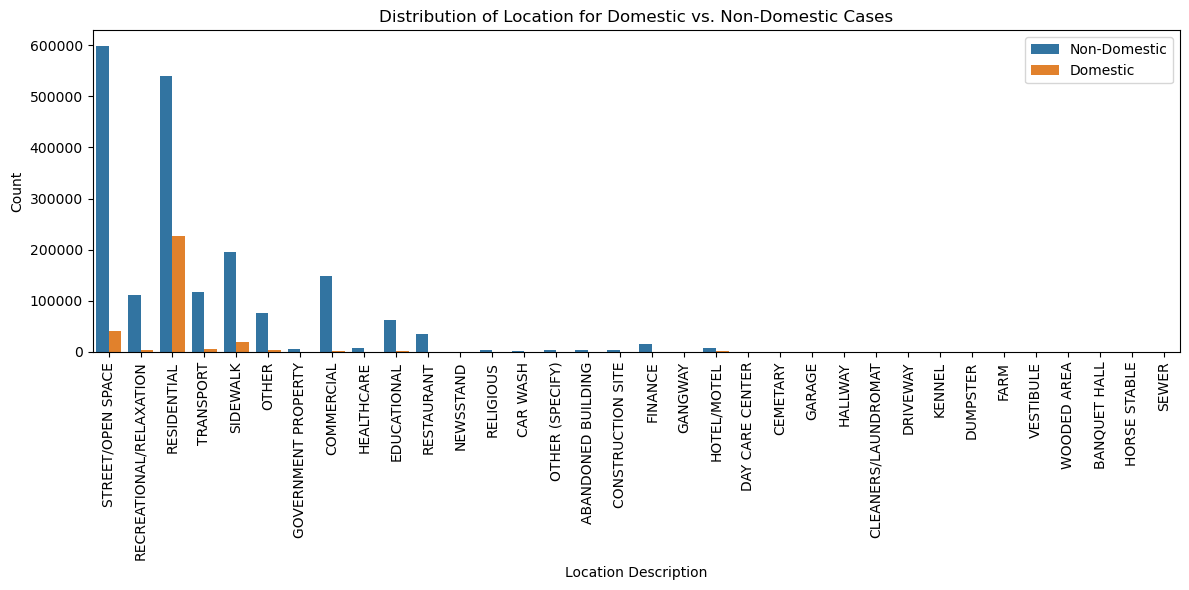

In [73]:
# Location analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='categorise location', data=df, hue='Domestic')
plt.title('Distribution of Location for Domestic vs. Non-Domestic Cases')
plt.xlabel('Location Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['Non-Domestic', 'Domestic'])
plt.tight_layout()
plt.show()

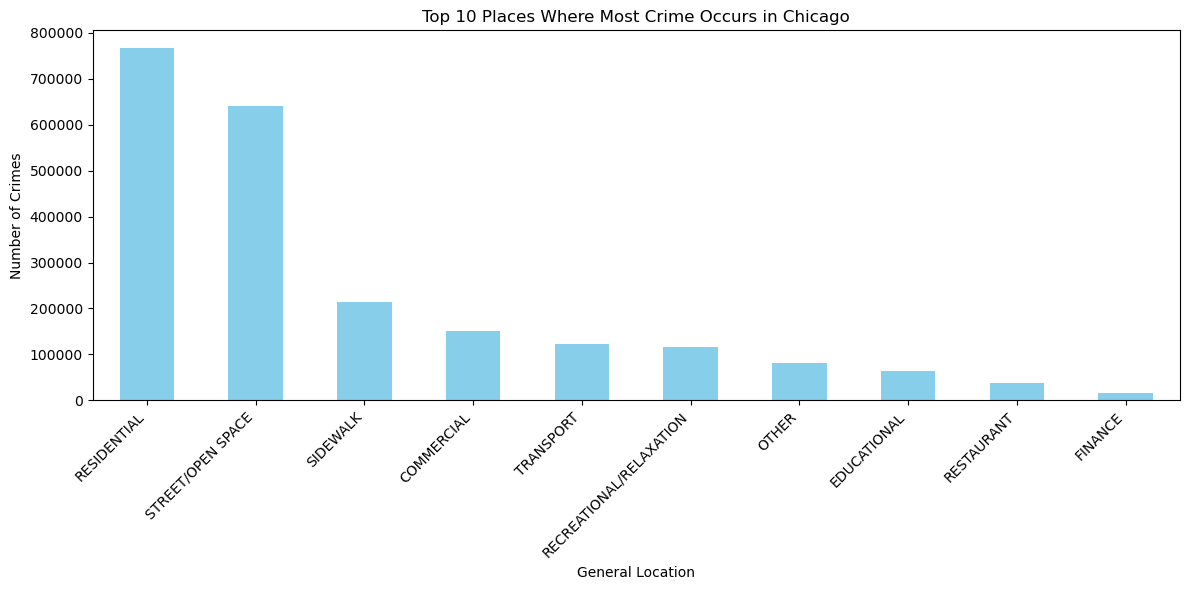

In [74]:
# Group by 'Location Description' and count occurrences of each location
location_counts = df['categorise location'].value_counts().sort_values(ascending=False)

# Plot the top locations where most crime takes place
top_n = 10  # You can adjust this number to show more or fewer top locations
plt.figure(figsize=(12, 6))
location_counts.head(top_n).plot(kind='bar', color='skyblue')
plt.title('Top {} Places Where Most Crime Occurs in Chicago'.format(top_n))
plt.xlabel('General Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

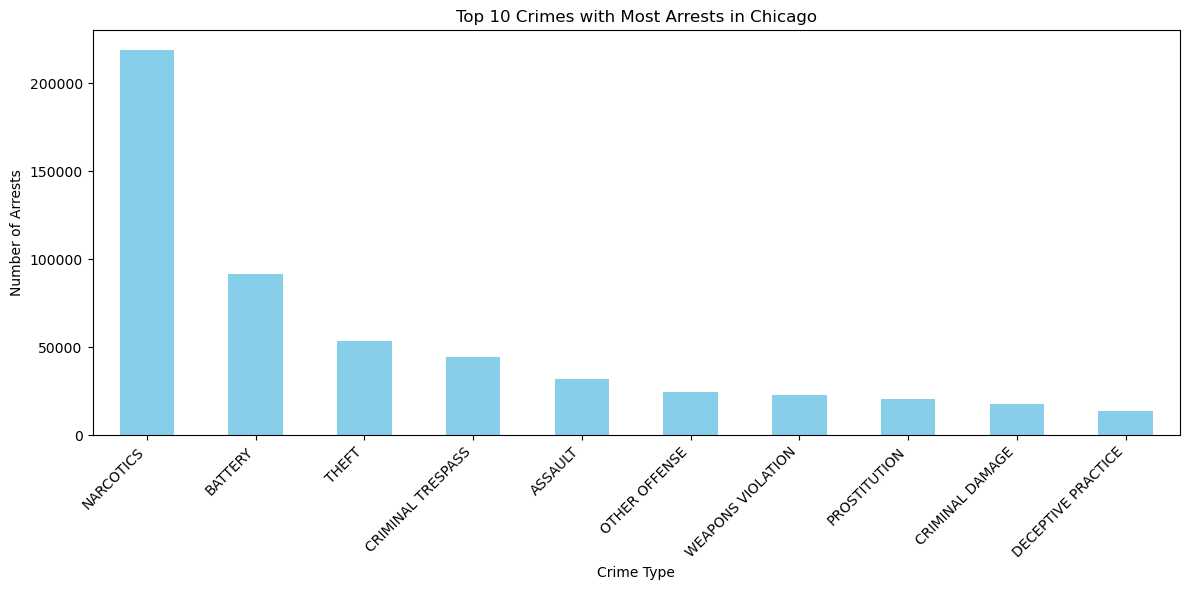

In [75]:
# Group by 'Primary Type' and calculate the number of arrests for each type of crime
arrest_counts = df.groupby('Primary Type')['Arrest'].sum().sort_values(ascending=False)

# Plot the top and bottom crimes with the most and least arrests
top_n = 10  # You can adjust this number to show more or fewer top crimes
plt.figure(figsize=(12, 6))
arrest_counts.head(top_n).plot(kind='bar', color='skyblue')
plt.title('Top {} Crimes with Most Arrests in Chicago'.format(top_n))
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


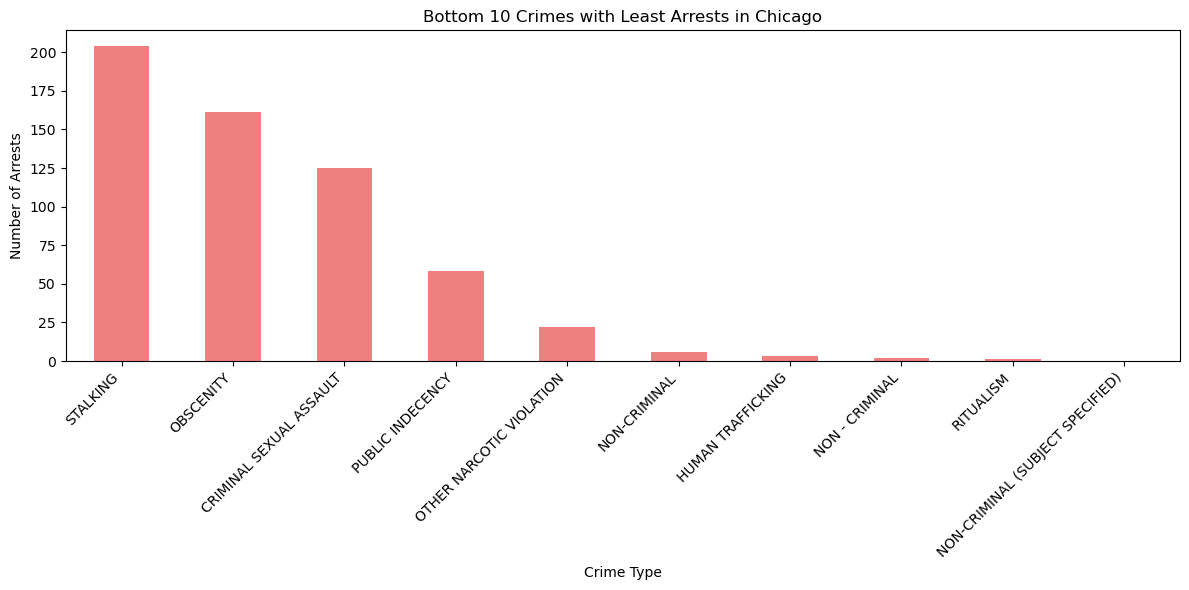

In [76]:
# Plot the bottom crimes with the least arrests
bottom_n = 10  # You can adjust this number to show more or fewer bottom crimes
plt.figure(figsize=(12, 6))
arrest_counts.tail(bottom_n).plot(kind='bar', color='lightcoral')
plt.title('Bottom {} Crimes with Least Arrests in Chicago'.format(bottom_n))
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### CASES AND UPLOAD DAYS

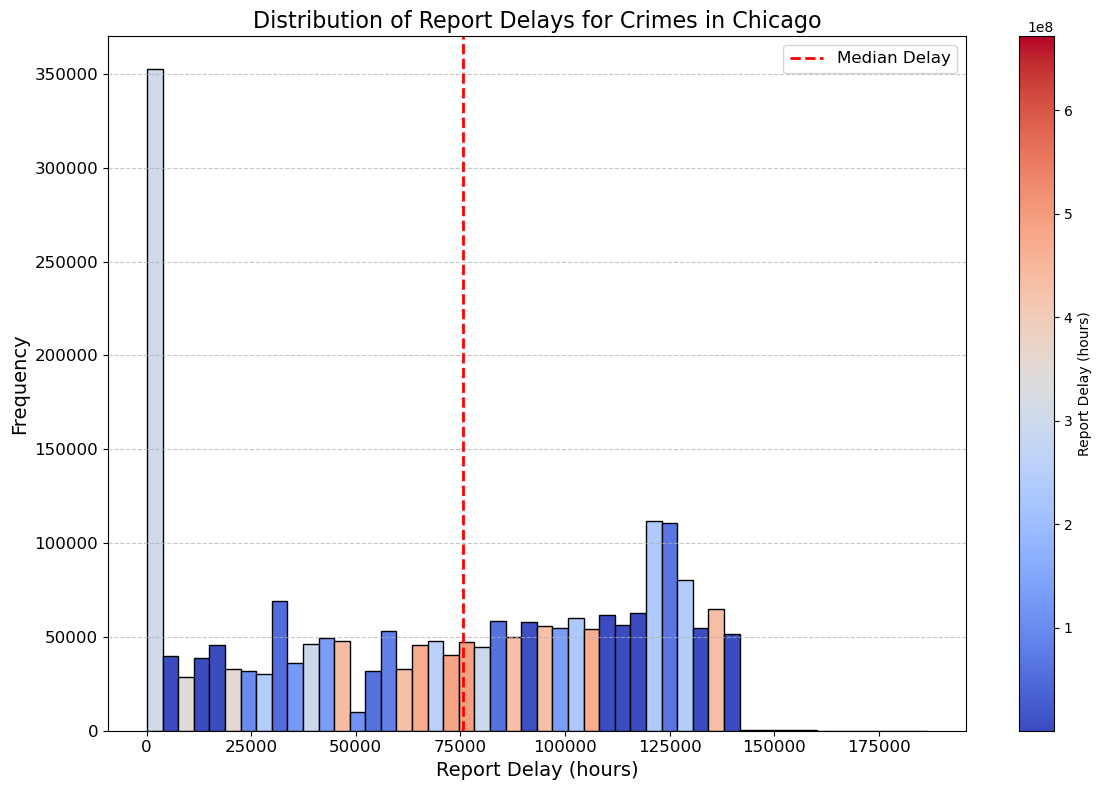

In [77]:
# Convert 'Updated On' column to datetime format with specified format
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%m/%d/%Y %I:%M:%S %p')

# Calculate the delay between occurrence and report time
df['Report Delay'] = df['Updated On'] - date_time
# Convert timedelta values to total seconds
df['Report Delay'] = df['Report Delay'].dt.total_seconds()

# Define colormap and normalize delays
colormap = plt.cm.coolwarm  # Choose a colormap (coolwarm in this case)
norm = plt.Normalize(df['Report Delay'].min(), df['Report Delay'].max())  # Normalize delays

# Plot the distribution of report delays with varying color
fig, ax = plt.subplots(figsize=(12, 8))
n, bins, patches = ax.hist(df['Report Delay'] / 3600, bins=50, edgecolor='black')

# Set colors for each patch based on the delay values
for patch, value in zip(patches, df['Report Delay']):
    color = colormap(norm(value))
    patch.set_facecolor(color)

# Add colorbar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label='Report Delay (hours)')

# Add title and labels
plt.title('Distribution of Report Delays for Crimes in Chicago', fontsize=16)
plt.xlabel('Report Delay (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(df['Report Delay'].median() / 3600, color='red', linestyle='--', linewidth=2, label='Median Delay')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


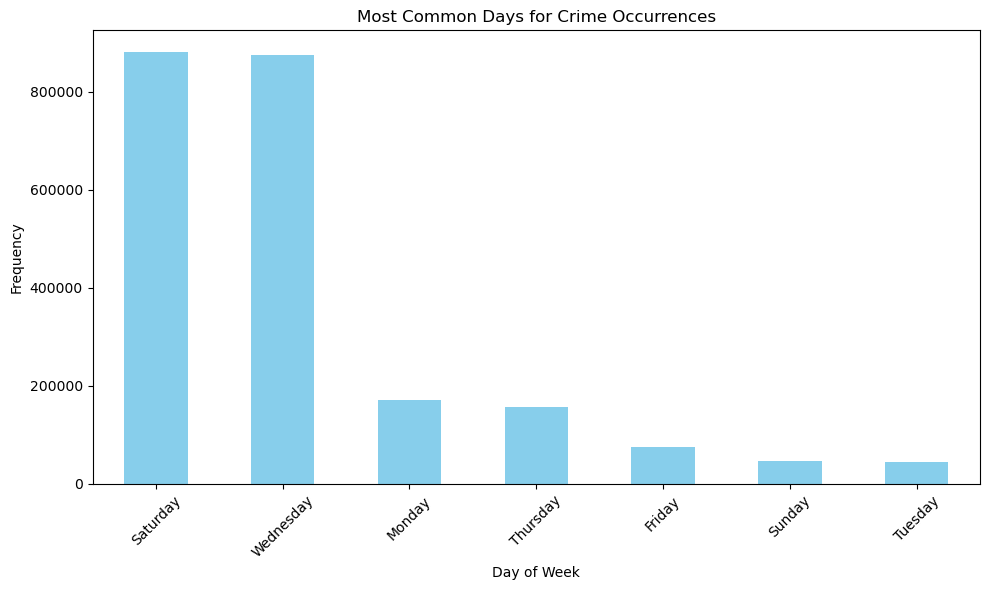

In [78]:
# Group by 'Updated On' day of the week and count occurrences of each day
day_counts = df['Updated On'].dt.day_name().value_counts().sort_values(ascending=False)

# Plot the days with the most crime occurrences
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Days for Crime Occurrences')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


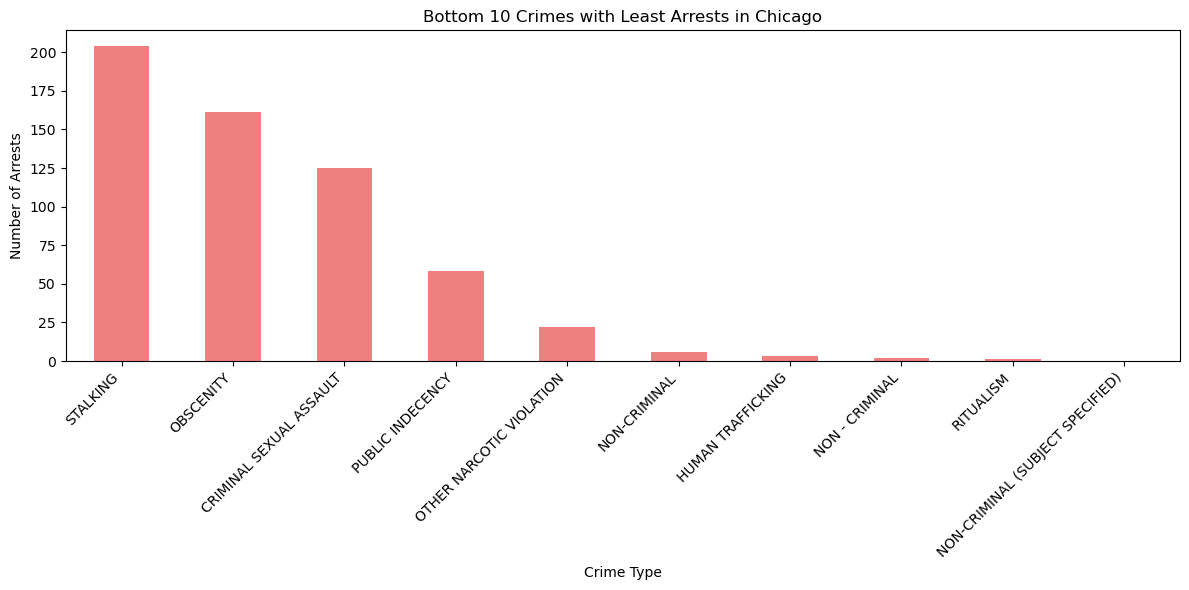

In [79]:
# Plot the bottom crimes with the least arrests
bottom_n = 10  # You can adjust this number to show more or fewer bottom crimes
plt.figure(figsize=(12, 6))
arrest_counts.tail(bottom_n).plot(kind='bar', color='lightcoral')
plt.title('Bottom {} Crimes with Least Arrests in Chicago'.format(bottom_n))
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

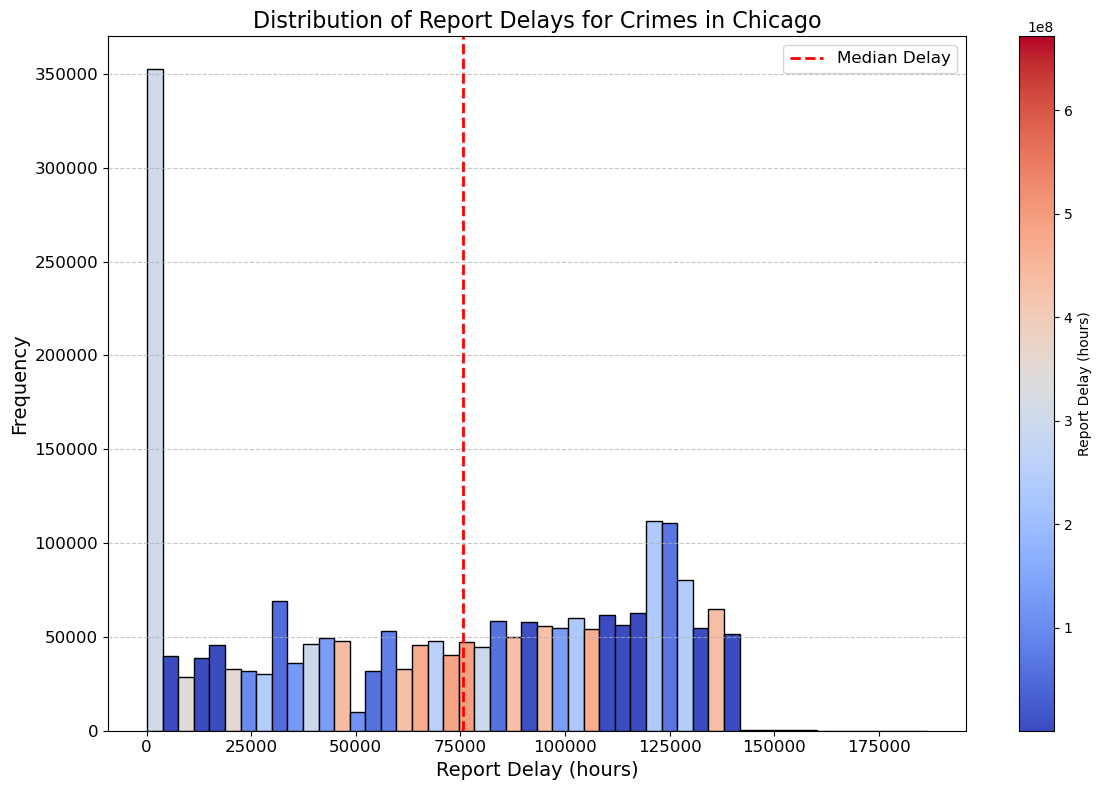

In [80]:
# Convert 'Updated On' column to datetime format with specified format
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%m/%d/%Y %I:%M:%S %p')

# Calculate the delay between occurrence and report time
df['Report Delay'] = df['Updated On'] - date_time

# Convert timedelta values to total seconds
df['Report Delay'] = df['Report Delay'].dt.total_seconds()

# Define colormap and normalize delays
colormap = plt.cm.coolwarm  # Choose a colormap (coolwarm in this case)
norm = plt.Normalize(df['Report Delay'].min(), df['Report Delay'].max())  # Normalize delays

# Plot the distribution of report delays with varying color
fig, ax = plt.subplots(figsize=(12, 8))
n, bins, patches = ax.hist(df['Report Delay'] / 3600, bins=50, edgecolor='black')

# Set colors for each patch based on the delay values
for patch, value in zip(patches, df['Report Delay']):
    color = colormap(norm(value))
    patch.set_facecolor(color)

# Add colorbar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label='Report Delay (hours)')

# Add title and labels
plt.title('Distribution of Report Delays for Crimes in Chicago', fontsize=16)
plt.xlabel('Report Delay (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(df['Report Delay'].median() / 3600, color='red', linestyle='--', linewidth=2, label='Median Delay')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


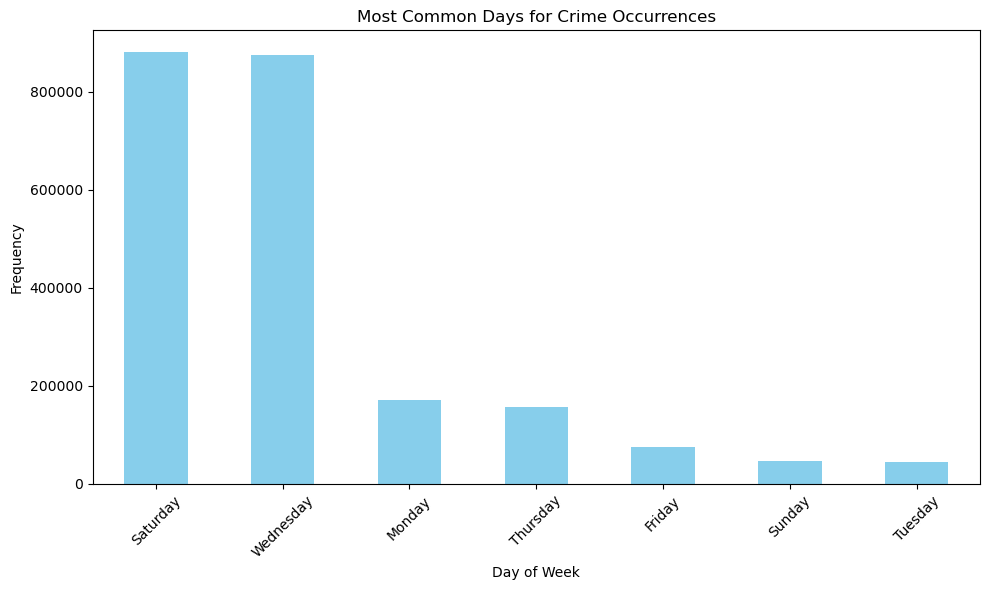

In [81]:
# Group by 'Updated On' day of the week and count occurrences of each day
day_counts = df['Updated On'].dt.day_name().value_counts().sort_values(ascending=False)

# Plot the days with the most crime occurrences
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Days for Crime Occurrences')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


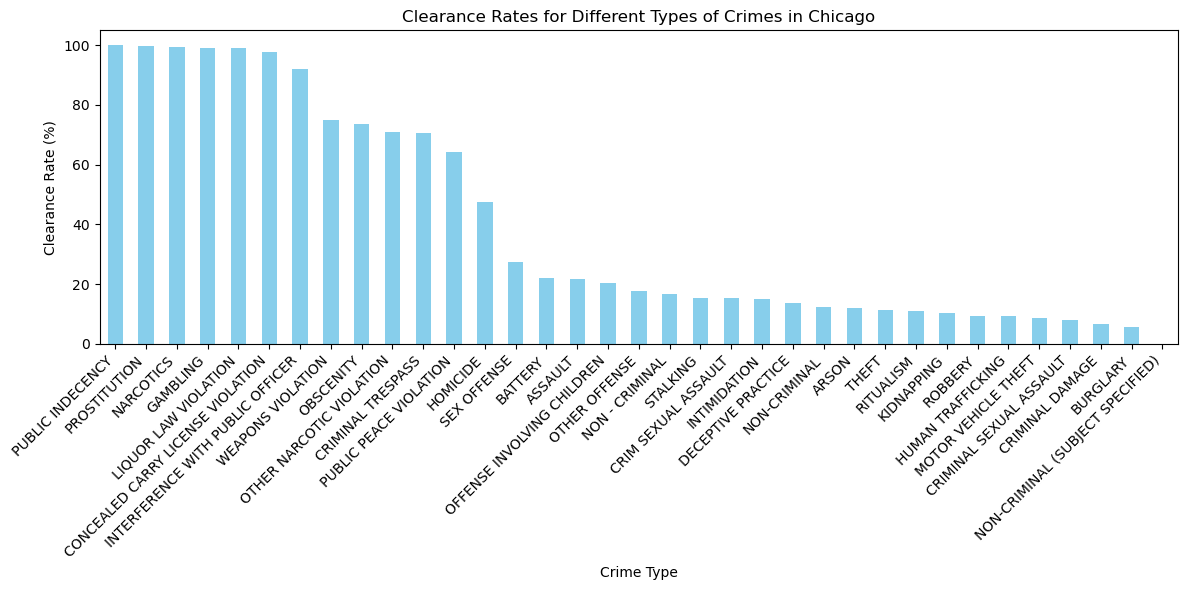

In [82]:
# Group by 'Primary Type' and calculate clearance rates
clearance_rates = df.groupby('Primary Type')['Arrest'].mean() * 100

# Plot clearance rates for different types of crimes
plt.figure(figsize=(12, 6))
clearance_rates.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Clearance Rates for Different Types of Crimes in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Clearance Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
night_time_range = list(range(18, 24)) + list(range(0, 6))  # Concatenate the two ranges

night_day

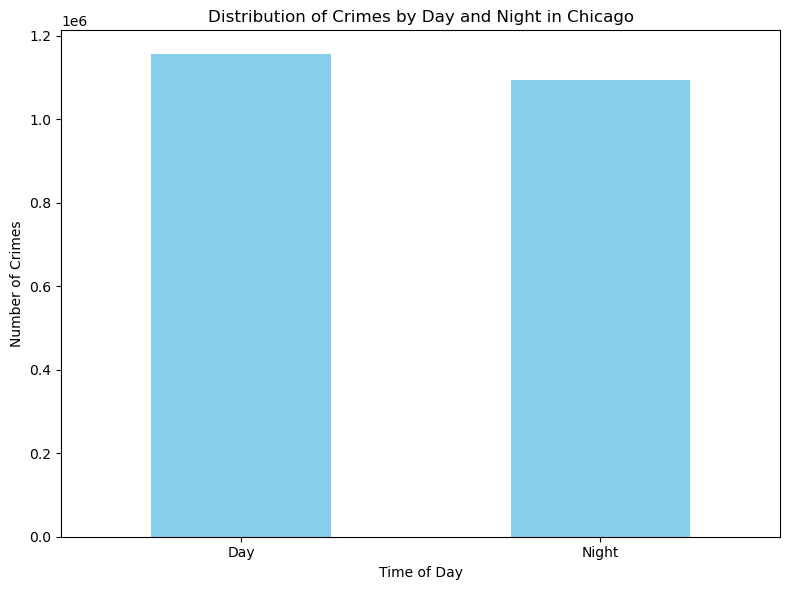

In [83]:
# Define day and night time ranges 
night_time_range = list(range(18, 24)) + list(range(0, 6))  # Concatenate the two ranges

# Categorize crimes as day or night
night_day = Hour.apply(lambda x: 'Night' if x in night_time_range else 'Day')

# Group by 'Day_Night' and count occurrences of each category
day_night_counts = night_day.value_counts()

# Plot the distribution of crimes by day and night
plt.figure(figsize=(8, 6))
day_night_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crimes by Day and Night in Chicago')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

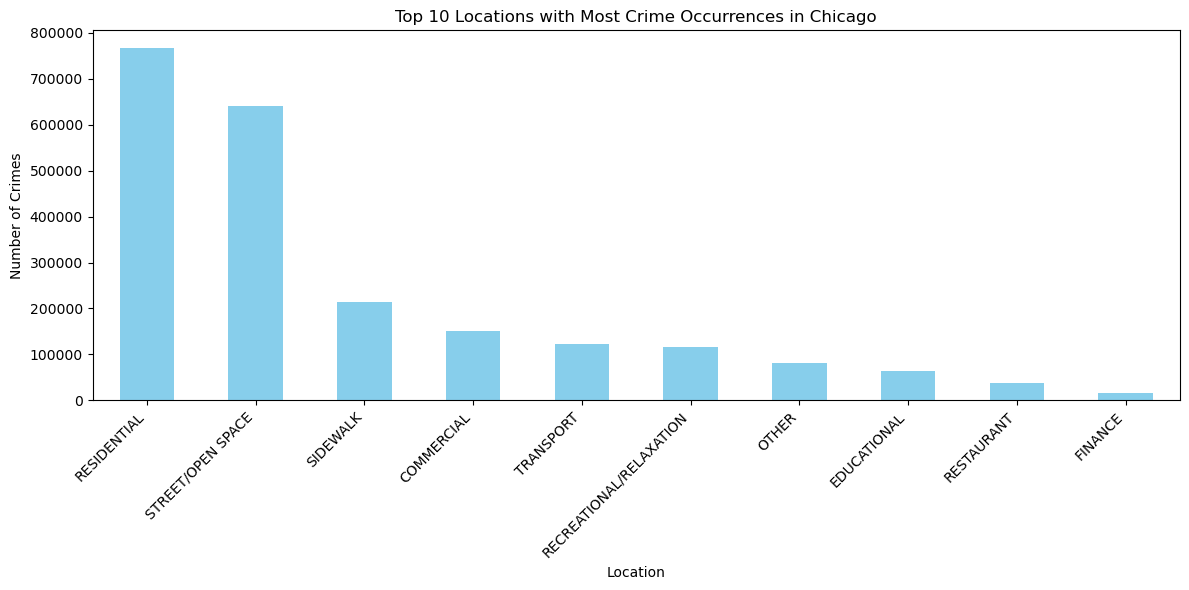

In [84]:
# Group by location (e.g., neighborhood or district) and count occurrences of each location
location_counts = df['categorise location'].value_counts()

# Plot the top 10 locations with the most crime occurrences
plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with Most Crime Occurrences in Chicago')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
# Count the number of crime incidents for each month
monthly_counts = df.groupby('Month').size()

# Get the month with the most and least crime incidents
most_crime_month = monthly_counts.idxmax()
least_crime_month = monthly_counts.idxmin()

# Create bar chart data
bar_chart_data = go.Bar(
    x=monthly_counts.index,  # Months on the x-axis
    y=monthly_counts.values,  # Number of crime incidents on the y-axis
    marker=dict(
        color=['blue' if month == most_crime_month else 'red' if month == least_crime_month else 'grey' for month in monthly_counts.index],  # Special color for the most and least crime months
    ),
)

# Create layout for the bar chart
layout = go.Layout(
    title='Chicago Crime Incidents by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Crime Incidents'),
)

# Create figure with bar chart data and layout
fig = go.Figure(data=bar_chart_data, layout=layout)

# Show the figure
fig.show()


In [86]:
# Count the number of crime incidents for each year
yearly_counts = df.groupby('Year').size()

# Get the year with the most and least crime incidents
most_crime_year = yearly_counts.idxmax()
least_crime_year = yearly_counts.idxmin()

# Create bar chart data
bar_chart_data = go.Bar(
    x=yearly_counts.index,  # Years on the x-axis
    y=yearly_counts.values,  # Number of crime incidents on the y-axis
    marker=dict(
        color=['blue' if year == most_crime_year else 'red' if year == least_crime_year else 'grey' for year in yearly_counts.index],  # Special color for the most and least crime years
    ),
)

# Create layout for the bar chart
layout = go.Layout(
    title='Chicago Crime Incidents by Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Crime Incidents'),
)

# Create figure with bar chart data and layout
fig = go.Figure(data=bar_chart_data, layout=layout)

# Show the figure
fig.show()


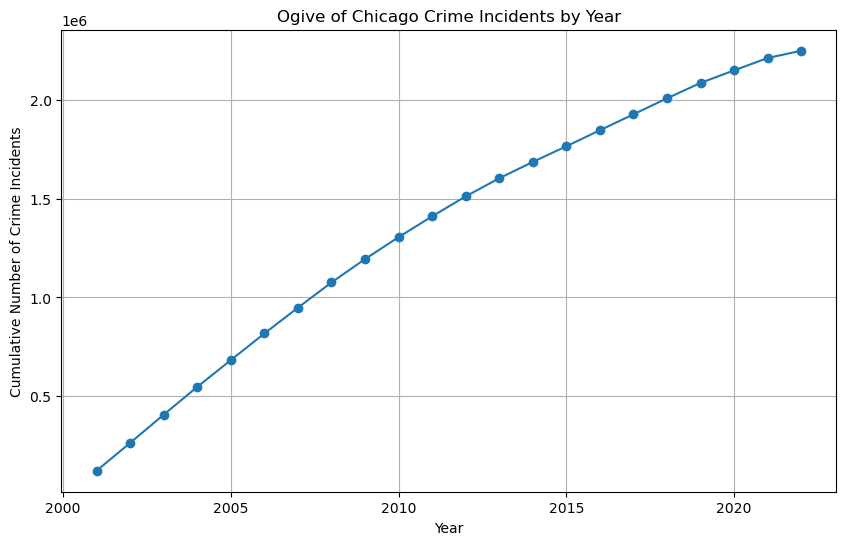

In [87]:
# Count the number of crime incidents for each year
yearly_counts = df.groupby('Year').size()

# Calculate cumulative sum of crime incidents
cumulative_counts = yearly_counts.cumsum()

# Create ogive plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-')

# Add labels and title
plt.title('Ogive of Chicago Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Crime Incidents')

# Show plot
plt.grid(True)
plt.show()


In [ ]:

# Count the number of crime incidents for each year
yearly_counts = df.groupby('Year').size()

# Calculate cumulative sum of crime incidents
cumulative_counts = yearly_counts.cumsum()

# Calculate the gradient (first derivative) using numpy's gradient function
years = cumulative_counts.index
gradient = np.gradient(cumulative_counts.values, years)

# Create plot of the gradient across the years
plt.figure(figsize=(10, 6))
plt.plot(years, gradient, marker='o', linestyle='-')

# Add labels and title
plt.title('Gradient of Chicago Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Gradient of Cumulative Number of Crime Incidents')

# Show plot
plt.grid(True)
plt.show()



In [88]:
# Convert 'Location Description' and 'Primary Type' to categorical codes
df['Location Description'] = df['Location Description'].astype('category')
df['Primary Type'] = df['Primary Type'].astype('category')

# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))  # Increased figsize for better visualization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


ValueError: Boolean array expected for the condition, not int64

In [ ]:

# Create a scatter plot for crime incidents
fig = go.Figure(go.Scattermapbox(
    lat=df['Latitude'],  # Latitude coordinates
    lon=df['Longitude'],  # Longitude coordinates
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=9,
        color='red',  # Color of markers (you can customize this)
        opacity=0.7
    ),
    text=df['Description'],  # Additional information for hover text
))

# Update layout of the map
fig.update_layout(
    title_text='Chicago Crime Incidents',
    hovermode='closest',  # Set hovermode to closest for better hover interaction
    mapbox=dict(
        style='carto-darkmatter',  # Choose map style (you can customize this)
        zoom=10,  # Initial zoom level
        center=dict(lat=df['Latitude'].mean(), lon=df['Longitude'].mean()),  # Center the map around the mean latitude and longitude
    )
)

# Show the figure
fig.show()


In [ ]:
# Group the DataFrame by 'Location Description' and count the occurrences of each neighborhood
crime_counts = df['Location Description'].value_counts()

# Create a new DataFrame from the crime_counts Series
crime_counts_df = crime_counts.reset_index()

# Rename the columns to 'Location Description' and 'Crime_Count'
crime_counts_df.columns = ['Location Description', 'Crime_Count']

# Merge crime_counts_df with the original DataFrame df on the 'Location Description' column
df = df.merge(crime_counts_df, on='Location Description', how='left')

In [ ]:
# Calculate the mean latitude and longitude of your data
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()

fig = go.Figure()

# Add Choroplethmapbox trace
fig.add_trace(
    go.Choroplethmapbox(
        geojson="chicago-community-areas.geojson",  # GeoJSON data for Chicago boundaries
        locations=df['Location Description'],  # Neighborhood names
        z=df['Crime_Count'],  # Crime counts for each neighborhood
        colorscale='RdBu',  # Choose colorscale (you can change this)
        colorbar=dict(title='Crime_Count'),  # Add colorbar title
        marker_line_width=0.5,
    )
)

# Update layout of the map
fig.update_layout(
    title_text='Chicago Crime Incidents by Neighborhood',  # Title of the map
    mapbox=dict(
        style='carto-positron',  # Choose map style (you can customize this)
        center=dict(lat=mean_latitude, lon=mean_longitude),  # Center the map around the mean latitude and longitude
        zoom=10,  # Initial zoom level
    )
)

# Show the figure
fig.show()

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month


# Count the number of crime incidents for each month
monthly_counts = df.groupby(['Month', 'Latitude', 'Longitude']).size().reset_index(name='Count')



# Get the month with the most and least crime incidents
most_crime_month = monthly_counts.groupby('Month')['Count'].sum().idxmax()
least_crime_month = monthly_counts.groupby('Month')['Count'].sum().idxmin()

# Create heatmap data for each month
heatmap_data = []
for month in range(1, 13):  # Iterate over each month (1 to 12)
    month_data = monthly_counts[monthly_counts['Month'] == month]
    heatmap_data.append(go.Densitymapbox(
        lat=month_data['Latitude'],  # Latitude coordinates
        lon=month_data['Longitude'],  # Longitude coordinates
        z=month_data['Count'],  # Number of crime incidents
        radius=10,  # Radius of each point in the heatmap
        name=str(month),  # Month as heatmap title
        coloraxis='coloraxis',  # Use coloraxis for gradient coloring
        showscale=False if month != most_crime_month and month != least_crime_month else True,  # Show color scale only for the most and least crime months
        opacity=0.8 if month != most_crime_month and month != least_crime_month else 1.0,  # Adjust opacity for the most and least crime months
        colorscale='Viridis',  # Choose a gradient colorscale (you can customize this)
        reversescale=True if month == least_crime_month else False  # Reverse the colorscale for the month with least crime
    ))

# Create layout for the heatmap
layout = go.Layout(
    title='Chicago Crime Incidents by Month',
    hovermode='closest',  # Set hovermode to closest for better hover interaction
    mapbox=dict(
        style='carto-darkmatter',  # Choose map style (you can customize this)
        zoom=10,  # Initial zoom level
        center=dict(lat=df['Latitude'].mean(), lon=df['Longitude'].mean()),  # Center the map around the mean latitude and longitude
    ),
    autosize=False,
    width=1000,
    height=600,
    coloraxis=dict(colorscale='Viridis'),  # Choose a gradient colorscale (you can customize this)
)

# Create figure with heatmap data and layout
fig = go.Figure(data=heatmap_data, layout=layout)

# Show the figure
fig.show()